In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def cal_perfstat(_df, cal_type):
    if cal_type == "ipc":
        _df["IPC"] = (_df["instructions"] / _df["cycles"])
    elif cal_type == "uop_ratio":
        _df["UOP_RATIO"] = (_df["uop_decoder"] / _df["instructions"])
    return _df

In [3]:
def do_df_parse(_df):
    _df_pivot = _df.pivot_table(values="counter_val",
                                columns=["counter_type"],
                                index=["window", "num_chunk"])
    _df_cal = cal_perfstat(_df_pivot, "ipc")
    _df_cal = cal_perfstat(_df_cal, "uop_ratio")
#     _chunk_sizes = _df["chunk_size"].drop_duplicates().to_numpy()
#     _chunk_sizes.sort()
#     return (_chunk_sizes, _df_cal)
    return _df_cal

## Window Size

In [4]:
ws_df = pd.read_csv('uop_reversing/test_1_window_220506113803_df.csv')

In [5]:
ws_df

,counter_type,counter_val,prog_type,arch_name,num_chunk,window
0,cycles,13846489343,first,hp-oldubuntu,1024,64
1,instructions,10426597120,first,hp-oldubuntu,1024,64
2,legacy_decoder,10427772049,first,hp-oldubuntu,1024,64
3,uop_decoder,65321,first,hp-oldubuntu,1024,64
4,cycles,13855701935,first,hp-oldubuntu,2048,32
...,...,...,...,...,...,...
139,uop_decoder,18094,first,hp-oldubuntu,4096,32
140,cycles,13823524477,first,hp-oldubuntu,8192,32
141,instructions,4180782020,first,hp-oldubuntu,8192,32
142,legacy_decoder,4181352418,first,hp-oldubuntu,8192,32


In [6]:
ws_df_parsed = do_df_parse(ws_df)

In [7]:
ws_df_parsed

counter_type           cycles  instructions  legacy_decoder  uop_decoder  \
window num_chunk                                                           
16     32         13846064716   21010977145        25787314  20986624704   
       64         13818942544   20516021606        23191981  20494249791   
       128        13838238688   21054899100        45719902  21010677517   
       256        13835009579   20369591273       241058193  20129924164   
       512        13841164866   19984411942     16985600154   3000233860   
       1024       13856521886   19555328379     19556340534       250287   
       2048       13864788149   19595572117     19596731613       109735   
       4096       13844868735   19395847261     19396698995        27787   
       8192       13852446382    4523372574      4523949645        15548   
32     32         13839935497   30019870243       850211247  29171084330   
       64         13849623526   30940758406         9013242  30933118161   
       128        13834210513   29121418712        18994989  29103920893   
       256        13850247036   23067652738        48158348  23020844554   
       512        13857011588   20909758590     19296893932   1614136012   
       1024       13837326898   20695597475     20695339680      1792690   
       2048       13855701935   20669431568     20670579152       197459   
       4096       13840698866   19519328386     19520141379        18094   
       8192       13823524477    4180782020      4181352418        12966   
64     32         13852015194   41422184530         9235895  41414480988   
       64         13770240926   39704494186        39228325  39668881966   
       128        13832147859   23099139571       151555762  22949157118   
       256        13839542910   20737774208     17251572595   3487577142   
       512        13840066277   20720817197     20595336023    127015976   
       1024       13846489343   10426597120     10427772049        65321   
       2048       13783646047    4502221733      4504116308        56522   
       4096       13850564460    3272846615      3273525759        13687   
       8192       13849564233    3295979152      3296563283        29661   
128    32         13300232755   31375167717        51048372  31337187094   
       64         13777030682   22370557356      1207351002  21167313092   
       128        13737182624   20460545833     16393879162   4069153473   
       256        13830050406   20704519212     20333281860    372901708   
       512        13842166192   10584073687     10585181037       127614   
       1024       13762981896    3471807535      3473257664        89991   
       2048       13845150920    2717394127      2718224081        38197   
       4096       13841722180    2502796317      2503519292        25131   
       8192       13838647071    2426526185      2427227531        37263   

counter_type           IPC     UOP_RATIO  
window num_chunk                          
16     32         1.517469  9.988410e-01  
       64         1.484630  9.989388e-01  
       128        1.521501  9.978997e-01  
       256        1.472322  9.882341e-01  
       512        1.443839  1.501287e-01  
       1024       1.411273  1.279892e-05  
       2048       1.413334  5.599990e-06  
       4096       1.400941  1.432626e-06  
       8192       0.326540  3.437258e-06  
32     32         2.169076  9.717259e-01  
       64         2.234051  9.997531e-01  
       128        2.105029  9.993991e-01  
       256        1.665505  9.979708e-01  
       512        1.508966  7.719534e-02  
       1024       1.495636  8.662180e-05  
       2048       1.491764  9.553190e-06  
       4096       1.410285  9.269786e-07  
       8192       0.302440  3.101334e-06  
64     32         2.990336  9.998140e-01  
       64         2.883355  9.991031e-01  
       128        1.669960  9.935070e-01  
       256        1.498444  1.681751e-01  
       512        1.497162  6.129873e-03  
       1024       0.753014  6.264844

Text(0, 0.5, 'UOP_RATIO')

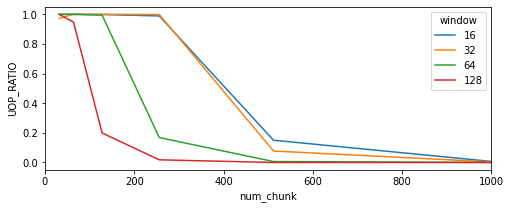

In [8]:
# Mentioned below is the link from where I got the graph done
# https://stackoverflow.com/a/25412939/13219331

ax = ws_df_parsed['UOP_RATIO'].unstack(level=0).plot(kind='line', rot=0, figsize=(8, 3))
plt.xlim(0, 1000)
plt.ylabel('UOP_RATIO')

# Line having the maximum drop is the window size

## Maximum Number of UOPS

In [8]:
nu_df = pd.read_csv('uop_reversing/test_2_numUop_220509173020_df.csv')

In [9]:
nu_df

,counter_type,counter_val,prog_type,arch_name,code_block_sz_1st,numuop
0,cycles,13727075453,first,hp-oldubuntu,16384,9
1,instructions,44526066094,first,hp-oldubuntu,16384,9
2,legacy_decoder,41061956256,first,hp-oldubuntu,16384,9
3,uop_decoder,3468257189,first,hp-oldubuntu,16384,9
4,cycles,13840484018,first,hp-oldubuntu,2048,7
...,...,...,...,...,...,...
247,uop_decoder,3391443718,first,hp-oldubuntu,16384,8
248,cycles,13845143761,first,hp-oldubuntu,65536,5
249,instructions,41208576595,first,hp-oldubuntu,65536,5
250,legacy_decoder,41210358428,first,hp-oldubuntu,65536,5


In [10]:
a = []
for num in list(nu_df['code_block_sz_1st']):
    a.append(num/32)
    
print(set(a))

{512.0, 256.0, 32.0, 64.0, 192.0, 96.0, 2048.0, 1024.0, 128.0}


In [31]:
nu_df1

,counter_type,counter_val,prog_type,arch_name,code_block_sz_1st,numuop
0,cycles,13727075453,first,hp-oldubuntu,16384,9
1,instructions,44526066094,first,hp-oldubuntu,16384,9
2,legacy_decoder,41061956256,first,hp-oldubuntu,16384,9
3,uop_decoder,3468257189,first,hp-oldubuntu,16384,9
4,cycles,13840484018,first,hp-oldubuntu,2048,7
...,...,...,...,...,...,...
247,uop_decoder,3391443718,first,hp-oldubuntu,16384,8
248,cycles,13845143761,first,hp-oldubuntu,65536,5
249,instructions,41208576595,first,hp-oldubuntu,65536,5
250,legacy_decoder,41210358428,first,hp-oldubuntu,65536,5


In [55]:
fltr = [4, 5, 6]
nu_df2 = nu_df1[nu_df1['numuop'].isin(fltr)]

In [56]:
nu_df2

,counter_type,counter_val,prog_type,arch_name,code_block_sz_1st,numuop
12,cycles,12947927659,first,hp-oldubuntu,1024,4
13,instructions,45254848934,first,hp-oldubuntu,1024,4
14,legacy_decoder,8450491,first,hp-oldubuntu,1024,4
15,uop_decoder,45247991202,first,hp-oldubuntu,1024,4
16,cycles,13729421123,first,hp-oldubuntu,16384,5
...,...,...,...,...,...,...
243,uop_decoder,50310771088,first,hp-oldubuntu,4096,4
248,cycles,13845143761,first,hp-oldubuntu,65536,5
249,instructions,41208576595,first,hp-oldubuntu,65536,5
250,legacy_decoder,41210358428,first,hp-oldubuntu,65536,5


In [51]:
def do_df_parse_nu(_df):
    _df_pivot = _df.pivot_table(values="counter_val",
                                columns=["counter_type"],
                                index=["numuop", "code_block_sz_1st"])
    _df_cal = cal_perfstat(_df_pivot, "ipc")
    _df_cal = cal_perfstat(_df_cal, "uop_ratio")
#     _chunk_sizes = _df["chunk_size"].drop_duplicates().to_numpy()
#     _chunk_sizes.sort()
#     return (_chunk_sizes, _df_cal)
    return _df_cal

In [57]:
nu_df_parsed = do_df_parse_nu(nu_df2)

In [58]:
nu_df_parsed

counter_type                   cycles  instructions  legacy_decoder  \
numuop code_block_sz_1st                                              
4      1024               12947927659   45254848934         8450491   
       2048               13837197505   48654261818        15136296   
       3072               13838053730   53674498052        11833527   
       4096               13836223233   50322472036        13631273   
       6144               13848520080   42516549988        48464613   
       8192               13815836798   39455350870        83027240   
       16384              13842903181   34837883260     30093138328   
       32768              13836027888   34468438152     34357316506   
       65536              13830183113   34231651276     34233087420   
5      1024               13845915734   55306602936         9746324   
       2048               13744920547   53293914156        68455202   
       3072               13814987739   54914416243        23455936   
       4096               13845311825   55295124405        15561030   
       6144               13848296947   52520548888        72827438   
       8192               13859658814   47658661295       306010279   
       16384              13729421123   40518568418     33275699071   
       32768              13838145871   41231237411     41179235487   
       65536              13845143761   41208576595     41210358428   
6      1024               13842810261   55288646949        10547610   
       2048               13826253756   55214854328        13004477   
       3072               13765334938   52693553976       908966608   
       4096               13853022006   55292535276        52174595   
       6144               13849360657   42135750024     25288733763   
       8192               13847084126   39400621339     28808642921   
       16384              13847774942   34227796463     31385895203   
       32768              13846360044   32405255986     32184114479   
       65536              13844660628   32231459484     32232962050   

counter_type              uop_decoder       IPC  UOP_RATIO  
numuop code_block_sz_1st                                    
4      1024               45247991202  3.495142   0.999848  
       2048               48641231452  3.516193   0.999732  
       3072               53664628954  3.878761   0.999816  
       4096               50310771088  3.637009   0.999767  
       6144               42469709451  3.070115   0.998898  
       8192               39374255566  2.855806   0.997945  
       16384               4746552092  2.516660   0.136247  
       32768                112935010  2.491209   0.003276  
       65536                   119348  2.475141   0.000003  
5      1024               55298900332  3.994434   0.999861  
       2048               53232606576  3.877353   0.998850  
       3072               54894156910  3.974988   0.999631  
       4096               55281867858  3.993780   0.999760  
       6144               52449812170  3.792564   0.998653  
       8192               47354273909  3.438660   0.993613  
       16384               7246614015  2.951222   0.178847  
       32768                 54068535  2.979535   0.001311  
       65536                    68137  2.976392   0.000002  
6      1024               55280132405  3.994033   0.999846  
       2048               55203922649  3.993479   0.999802  
       3072               51788861656  3.827989   0.982831  
       4096               55242498192  3.991370   0.999095  
       6144               16848671856  3.042433   0.399866  
       8192               10593459577  2.845409   0.268865  
       16384               2843477115  2.471718   0.083075  
       32768                222909083  2.340345   0.006879  
       65536                    63112  2.328079   0.000002

Text(0, 0.5, 'UOP_RATIO')

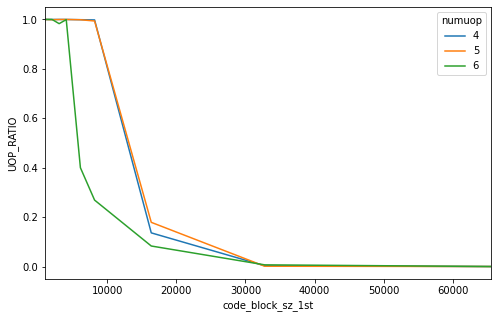

In [59]:
ax = nu_df_parsed['UOP_RATIO'].unstack(level=0).plot(kind='line', rot=0, figsize=(8, 5))
plt.xlim(1024, 65536)
plt.ylabel('UOP_RATIO')